Complete the exercises below For **Assignment #11**.

For this assignment we'll use the [California Housing Data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

This data is available in the [Scikit-Learn](https://scikit-learn.org/stable/index.html) Python module.

To retrieve the data,
1. open a new Python notebook with the `data730` kernel, and,
2. run the following code.

```python
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

california_housing.data.to_csv('california-housing.csv', index=False)
```

This will produce a new file called `california-housing.csv` that we'll import in this notebook.

Back in the Python notebook, you can use the following snippet to get a description of the dataset.

```python
print(california_housing.DESCR)
```


Load the `tidymodels` package.

In [1]:

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)


In [2]:
import pandas as pd
housing = pd.concat([california_housing.data,california_housing.target],axis=1)
housing.to_csv('data.csv')


In [3]:
print (california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Run the following cell to read in our data.

In [1]:
library('httr')
library('tidyverse')
library('tidymodels')
library('readr')
library('ranger')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.0 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ 

In [2]:
housing = read_csv('data.csv')

housing |> head()

New names:
• `` -> `...1`
Rows: 20640 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ...1, MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,8.3252,41,6.984127,1.0238095,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.9718805,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.0734463,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.0730594,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.0810811,565,2.181467,37.85,-122.25,3.422
5,4.0368,52,4.761658,1.1036269,413,2.139896,37.85,-122.25,2.697


Let's build a random forest model to predict `MedianHouseValue`.

1. Create your model, set the engine to `ranger` with `importance = 'impurity'` and the mode as `regression`.
2. Fit the model using `MedianHouseValue` as the response variable and all other columns as predictors.

In [3]:
model<- ranger(MedHouseVal ~ ., 
                   data = housing, 
                   importance = 'impurity',
                   mtry = 3)
print(model)



Ranger result

Call:
 ranger(MedHouseVal ~ ., data = housing, importance = "impurity",      mtry = 3) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      20640 
Number of independent variables:  9 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       0.2043062 
R squared (OOB):                  0.8465726 


❓ What is the OOB error for this model?

**Answer:**

The OOB for this model is 0.2043062 



Plot the feature importances using the `vip` package. Remember that you can use the `extract_fit_engine` function to get the `ranger` model object to send to the `vip` function.


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




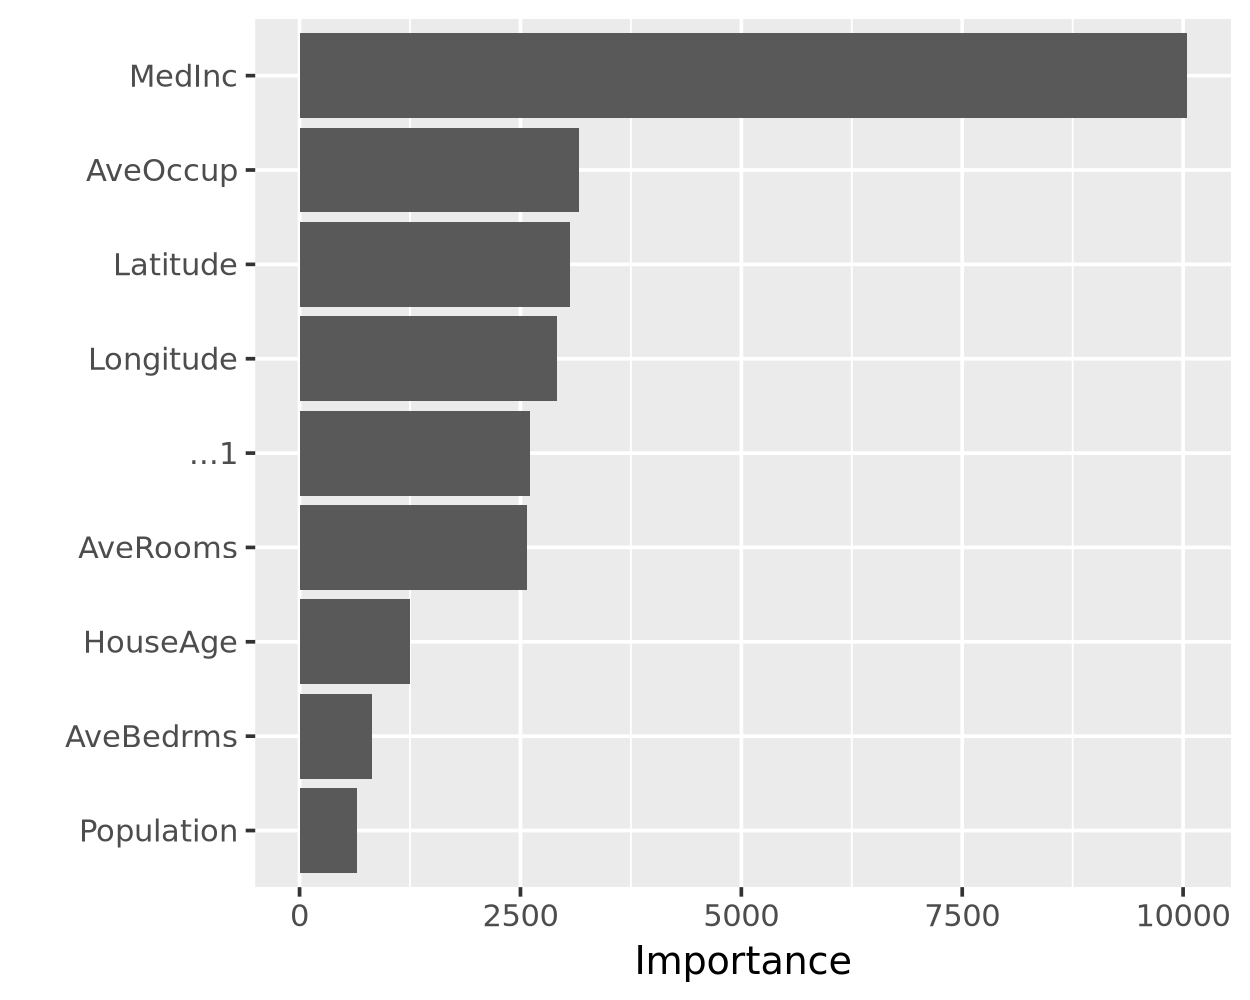

In [4]:
library('vip')

vip(model, title = "Ranger")


It looks like `Latitude` and `Longitude` are important for precicting home value. Let's explore those variables.

Install the `mapdata` package into your `data730` environment.

1. Open a Terminal, and,
2. Run the following command:

```bash
conda install -c conda-forge -n data730 r-mapdata
```

Load the `mapdata` package.

In [5]:
library('mapdata')



Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




The following code will generate a map of California. Adapt this code to plot `Latitude` and `Longitude` from the `housing` dataset, color points by the `MedianHouseValue`. [Here is an example for reference](https://raw.githubusercontent.com/UNC-DATA-730/a10/main/example.png).


```r
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()
```

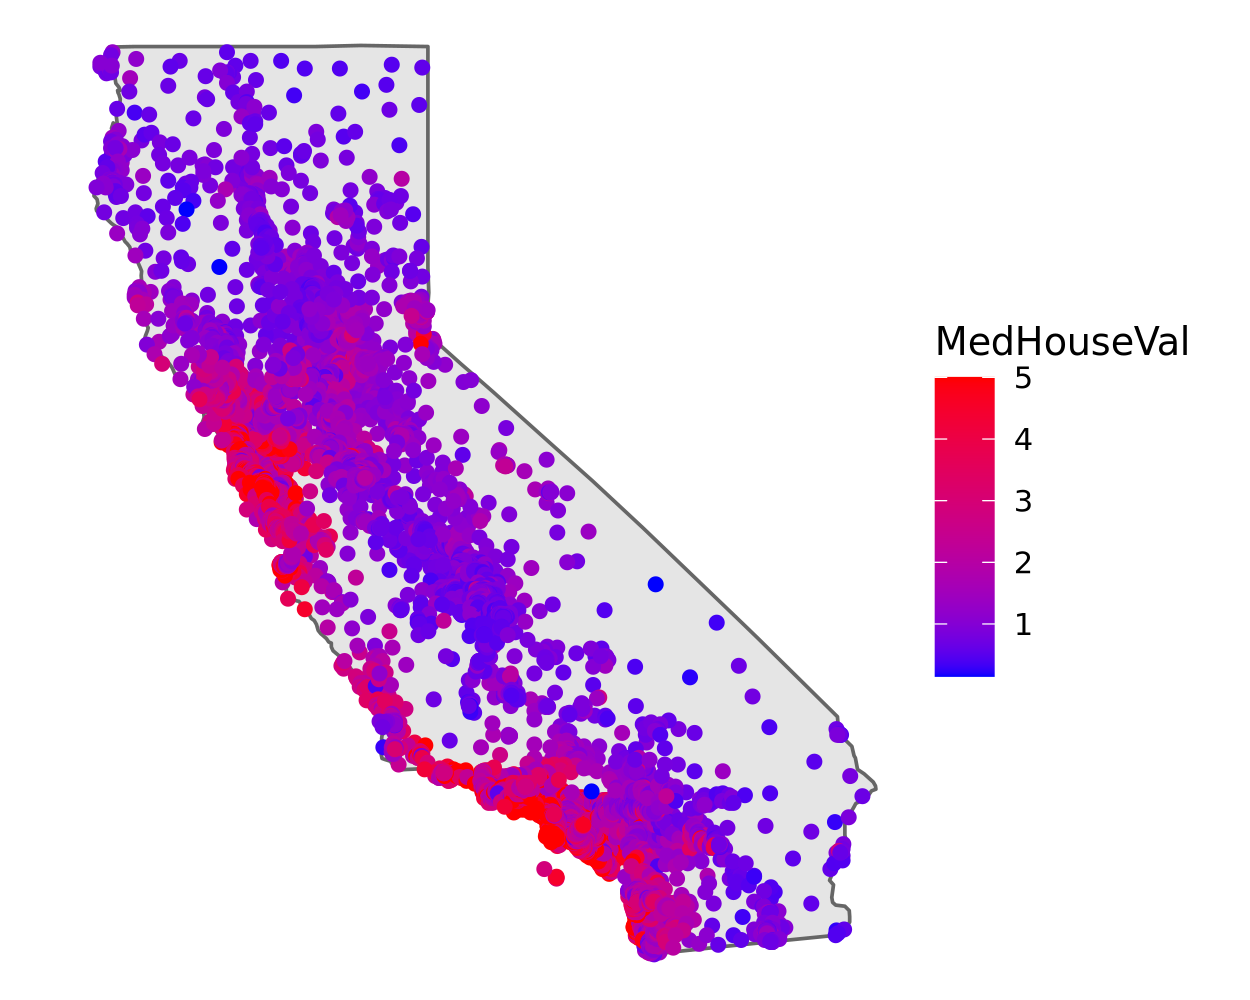

In [7]:

california = map_data("state") |> filter(region == 'california')

ggplot() + 
  geom_polygon(data = california, aes(x = long, y = lat), fill = "grey90", color = "grey40") +
  geom_point(data = housing, aes(x = Longitude, y = Latitude, color = MedHouseVal)) +
  scale_color_gradient(low = "blue", high = "red") +  
  coord_quickmap() +
  theme_void()